# Setup
The first chunk below should allow you to connect to the oracle sql server in this jupyter file. Either make sure to create a .env file of your credentials or manually change them in the code below. If you are manually adding your credentials, please remember to remove them before committing changed code to github so other people do not see. Also, please ensure you have downloaded the oracle zip wallet from: https://ab-data.dataforgood.ca/s/k55ftpe4cs87eiw

In [1]:
import oracledb
import pandas as pd
import os
from dotenv import load_dotenv

# Define the connection string using the Oracle Wallet and credentials in your .env file
dsn = "dfgyyc11_high"
load_dotenv(override=True) # You can comment this out if you are not using a .env file
# If you are not using a .env file to store your credentials, you can manually add them below as strings
wallet_path = os.getenv('wallet_path')
username = os.getenv('username')
password = os.getenv('password')

connection = oracledb.connect(dsn=dsn, config_dir = wallet_path, user = username, password = password)

# Sample query below
query = '''
    SELECT * FROM STATSCAN.CDS_ONTARIO
    WHERE ROWNUM <= 10
'''

# # Create a cursor and run a query
# cursor = connection.cursor()
# cursor.execute(query)

# # Fetch the results
# for row in cursor:
#     print(row)


# Alternatively, we can use pandas to retrieve and read into a dataframe
df = pd.read_sql(query, con = connection)

# Clean up
connection.close()

df.head()


C:\Users\j_chr\AppData\Local\Temp\ipykernel_37196\2779581308.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con = connection)


,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,TNR_SF,TNR_LF,DATA_QUALITY_FLAG,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,...,C2_COUNT_MEN_,SYMBOL1,C3_COUNT_WOMEN_,SYMBOL2,C10_RATE_TOTAL,SYMBOL3,C11_RATE_MEN_,SYMBOL4,C12_RATE_WOMEN_,SYMBOL5
0,2021,2021S051235600352,35600352,Dissemination area,35600352,5,5.2,0,374,In seventh decile,...,20.0,None,15.0,None,10.2,None,13.3,None,10.3,None
1,2021,2021S051235600352,35600352,Dissemination area,35600352,5,5.2,0,375,In eighth decile,...,20.0,None,15.0,None,11.9,None,13.3,None,10.3,None
2,2021,2021S051235600352,35600352,Dissemination area,35600352,5,5.2,0,376,In ninth decile,...,25.0,None,20.0,None,13.6,None,16.7,None,13.8,None
3,2021,2021S051235600352,35600352,Dissemination area,35600352,5,5.2,0,377,In top decile,...,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None
4,2021,2021S051235600352,35600352,Dissemination area,35600352,5,5.2,0,378,Total - Inequality measures for the population...,...,NaN,...,NaN,...,295.0,None,NaN,...,NaN,...


# Organizations, Schemas, and Tables
There are 8 organizations (and 8 respective schemas) from which we can gather data. Below is a table of all schemas from the link: https://docs.google.com/document/d/1bofcf1-oy9kJOImRBQg_jkRoT5XvAlGf/edit?tab=t.0
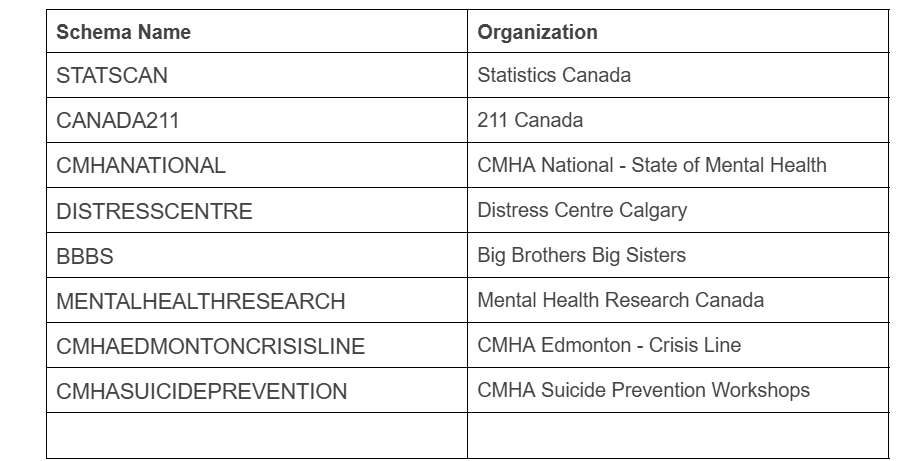

In [2]:
# We can view all of the available tables below
connection = oracledb.connect(dsn=dsn, config_dir = wallet_path, user = username, password = password)

schemas = ['STATSCAN', 'CANADA211', 'CMHANATIONAL', 'DISTRESSCENTRE', 'BBBS', 'MENTALHEALTHRESEARCH', 'CMHAEDMONTONCRISISLINE', 'CMHASUICIDEPREVENTION']

for schema in schemas:
    query = f'''
        SELECT table_name
        FROM all_tables
        WHERE owner = '{schema}'
        ORDER BY table_name
    '''
    print(f'Schema: {schema}')
    df = pd.read_sql(query, con=connection)
    display(df)

Schema: STATSCAN


C:\Users\j_chr\AppData\Local\Temp\ipykernel_37196\1513682367.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


,TABLE_NAME
0,CANADA_PROVINCES_TERRITORIES
1,CDS_ATLANTIC
2,CDS_BRITISHCOLUMBIA
3,CDS_ONTARIO
4,CDS_PRAIRIES
5,CDS_QUEBEC
6,CDS_TERRITORIES
7,CLOUD_INGEST_LOG$
8,CMAS_CAS_CSDS
9,DBTOOLS$EXECUTION_HISTORY


Schema: CANADA211


C:\Users\j_chr\AppData\Local\Temp\ipykernel_37196\1513682367.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


,TABLE_NAME
0,BC_211_CALLREPORTS
1,BC_211_NEEDS
2,BC_211_REFERRALS
3,CALGARY_211_CALLREPORTS
4,CALGARY_211_NEEDS
5,CALGARY_211_REFERRALS
6,CENTRAL_211_CALLREPORTS
7,CENTRAL_211_NEEDS
8,CENTRAL_211_REFERRALS
9,DBTOOLS$EXECUTION_HISTORY


Schema: CMHANATIONAL


C:\Users\j_chr\AppData\Local\Temp\ipykernel_37196\1513682367.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


,TABLE_NAME
0,INDICATOR_TABLES_JOINED
1,INDICATOR_TABLES_JOINED_COLUMN_NAMES


Schema: DISTRESSCENTRE


C:\Users\j_chr\AppData\Local\Temp\ipykernel_37196\1513682367.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


,TABLE_NAME
0,CLOUD_INGEST_LOG$
1,CRISIS_CT_DATA_2019
2,CRISIS_CT_DATA_2020
3,CRISIS_CT_DATA_2021_2022
4,CRISIS_CT_DATA_2023_2024
5,CRSIS_CT_DATA_2015_2016
6,CRSIS_CT_DATA_2017_2018
7,DBTOOLS$EXECUTION_HISTORY


Schema: BBBS


C:\Users\j_chr\AppData\Local\Temp\ipykernel_37196\1513682367.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


,TABLE_NAME


Schema: MENTALHEALTHRESEARCH


C:\Users\j_chr\AppData\Local\Temp\ipykernel_37196\1513682367.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


,TABLE_NAME
0,Guard_Minds_2023_Final
1,MHRC_13_23
2,MHRC_20_22
3,MHRC_Poll_21


Schema: CMHAEDMONTONCRISISLINE


C:\Users\j_chr\AppData\Local\Temp\ipykernel_37196\1513682367.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


,TABLE_NAME
0,CALLREPORTS
1,CALLREPORTSLINKEDTOGETHER
2,REFERRALS


Schema: CMHASUICIDEPREVENTION


C:\Users\j_chr\AppData\Local\Temp\ipykernel_37196\1513682367.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=connection)


,TABLE_NAME
0,ASIST_PROGRAMS_COMBINED
1,A_2020_21_ASIST_WORKSHOPS
2,A_2020_21_NON_ASIST_WORKSHOPS
3,A_2021_22_ASIST_WORKSHOPS
4,A_2021_22_NON_ASIST_WORKSHOPS
5,A_2022_23_ASIST_WORKSHOPS
6,A_2022_23_NON_ASIST_WORKSHOPS
7,A_2023_24_ASIST_WORKSHOPS
8,A_2023_24_NON_ASIST_WORKSHOPS
9,DATA_DICTIONARY
